In [1]:
#@title Installing dependencies { display-mode: "both" }
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install jupyter
!pip install matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-tk is already the newest version (2.7.14-1).
The following additional packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  liblcms2-utils python-genshi python-lxml-dbg python-lxml-doc python-pil-doc
  python-pil-dbg python-setuptools
The following NEW packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 protobuf-compiler python-bs4 python-chardet python-html5lib
  python-lxml python-olefile python-pil python-pkg-resources python-six
  python-webencodings
0 upgraded, 18 newly installed, 0 to remove and 0 not upgraded.
Need to get 3,751 kB of archives.
After this operation, 14.6 MB of additional disk space will be used.
Get:1 

In [2]:
#@title Clone the tensorflow repository
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Counting objects: 21316, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 21316 (delta 0), reused 0 (delta 0), pack-reused 21310
Receiving objects: 100% (21316/21316), 558.39 MiB | 32.16 MiB/s, done.
Resolving deltas: 100% (12521/12521), done.
Checking out files: 100% (2669/2669), done.


In [3]:
#@title train and eval folders for storing ckpt checkpoints after training
%cd /content/models/research
%mkdir train eval



/content/models/research


In [4]:
#@title protobuf installation { display-mode: "both" }
!protoc object_detection/protos/*.proto --python_out=.
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [5]:
#@title Installation test
!python object_detection/builders/model_builder_test.py

..................
----------------------------------------------------------------------
Ran 18 tests in 0.100s

OK


In [6]:
#@title Download and extract the dataset
!wget http://bit.ly/udacity-annoations-crowdai
!mv udacity-annoations-crowdai udacity-annoations-crowdai.tar.gz
!tar -xvf udacity-annoations-crowdai.tar.gz

--2018-08-20 07:51:10--  http://bit.ly/udacity-annoations-crowdai
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3.amazonaws.com/udacity-sdc/annotations/object-detection-crowdai.tar.gz [following]
--2018-08-20 07:51:11--  https://s3.amazonaws.com/udacity-sdc/annotations/object-detection-crowdai.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.134.109
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.134.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1650810880 (1.5G) [application/x-gzip]
Saving to: ‘udacity-annoations-crowdai’

udacity-annoations- 100%[===================>]   1.54G  28.3MB/s    in 58s     

2018-08-20 07:52:09 (27.4 MB/s) - ‘udacity-annoations-crowdai’ saved [1650810880/1650810880]

object-detection-crowdai/
object-detection-crowdai/1479499580548628685.jpg
object-det

In [7]:
#@title Resize the images
from os import listdir
filenames = [f for f in listdir("./object-detection-crowdai/")]
%cd ./object-detection-crowdai/
import cv2
 
for f in filenames:
  if (f == "labels.csv"):
    continue
  image = cv2.imread(f)  
  dim = (960, 600)
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  cv2.imwrite(f, resized)
  print(f)

/content/models/research/object-detection-crowdai
1479501651189908903.jpg
1479499510541618162.jpg
1479504772897589067.jpg
1479505861471485023.jpg
1479504751899104181.jpg
1479505081918104126.jpg
1479500094066547277.jpg
1479502934273835047.jpg
1479500855133267778.jpg
1479498820473341507.jpg
1479502298234158295.jpg
1479500722627074984.jpg
1479498866999926267.jpg
1479504074852955498.jpg
1479503510312541364.jpg
1479499743059498709.jpg
1479501662687945739.jpg
1479504008846526063.jpg
1479505685443015445.jpg
1479503591318057979.jpg
1479499630049824830.jpg
1479501436672944908.jpg
1479505182928061315.jpg
1479504976391099295.jpg
1479505645458067538.jpg
1479499412536319711.jpg
1479501537181782897.jpg
1479506107989956323.jpg
1479503509812349700.jpg
1479498668483567462.jpg
1479503563318832679.jpg
1479504135855616158.jpg
1479504435875012867.jpg
1479498426466745268.jpg
1479499595547139757.jpg
1479498999006226908.jpg
1479505585451959167.jpg
1479506165491761103.jpg
1479503617801697940.jpg
14795002120895

In [8]:
%cd ..

/content/models/research


In [9]:
#@title Download the model
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz
!tar -xvf ssd_mobilenet_v1_coco_2017_11_17.tar.gz

--2018-08-20 08:01:27--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.166.128, 2a00:1450:400c:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.166.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76534733 (73M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_coco_2017_11_17.tar.gz’

ssd_mobilenet_v1_co 100%[===================>]  72.99M  42.3MB/s    in 1.7s    

2018-08-20 08:01:29 (42.3 MB/s) - ‘ssd_mobilenet_v1_coco_2017_11_17.tar.gz’ saved [76534733/76534733]

ssd_mobilenet_v1_coco_2017_11_17/
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.index
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.meta
ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_2017_11_17/saved_model/
ssd_mobilenet_v1_coco_2017_11_17/saved_model/saved_

In [0]:
#@title Import the model config file from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1o774Hv9-q2sksRKal2cHo2RBKVEFL2Pv'}) # replace with the id of file you want to access
downloaded.GetContentFile('ssd_mobilenet_v1_coco.config')  



In [0]:
#@title Import the model config file from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1KtH-c241ifjnsfdby-3qFQiM8EZppExJ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('labels_crowdai.csv')  

In [0]:
#@title Import the model config file from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1Llfon00B2IYfcgg-RYgJnfzXoIv9yEBl'}) # replace the id with id of file you want to access
downloaded.GetContentFile('car_label_map.pbtxt')

The following sections denotes the usage of Pandas library along with images to create TF records for training.

In [13]:
annotation_path = "labels_crowdai.csv"
import pandas as pd
df = pd.read_csv(annotation_path, sep = ",")
print(df.columns)

Index(['xmin', 'ymin', 'xmax', 'ymax', 'Frame', 'Label', 'Preview URL'], dtype='object')


In [14]:
df = df.drop(df.columns[ [-1] ], axis = 1)
df.head()
df = df[['Frame','xmin', 'ymin','xmax','ymax','Label']]
df.rename(columns={'Frame': 'frame', 'Label': 'label'}, inplace=True)
df.head()

frame   xmin   ymin   xmax   ymax  label
0  1479498371963069978.jpg  392.5  266.5  452.5  322.0    Car
1  1479498371963069978.jpg   44.5  275.5  145.5  340.0    Car
2  1479498371963069978.jpg  134.0  273.0  191.5  325.0    Car
3  1479498371963069978.jpg  227.5  261.0  274.0  307.5  Truck
4  1479498371963069978.jpg  274.0  261.0  312.5  302.5  Truck

In [15]:
import os
# cardfgg_1 = df[df.label == 'Car']
# cardfg_1 = cardfgg_1.groupby(['frame'], as_index = False)
cardfg_1 = df.groupby(['frame'], as_index = False)

cardfl_1 = cardfg_1.aggregate( lambda x : list(x) )

# Add relative path to files
cardfl_1.reset_index()
cardfl_1['frame'] = cardfl_1['frame'].apply(lambda x: os.path.join("./object-detection-crowdai", x))
cardfl_1.head()

frame  \
0  ./object-detection-crowdai/1479498371963069978...   
1  ./object-detection-crowdai/1479498372942264998...   
2  ./object-detection-crowdai/1479498373462797835...   
3  ./object-detection-crowdai/1479498373962951201...   
4  ./object-detection-crowdai/1479498374962942172...   

                                                xmin  \
0  [392.5, 44.5, 134.0, 227.5, 274.0, 863.0, 379....   
1  [355.0, 0.0, 69.5, 184.0, 236.0, 281.0, 884.5,...   
2  [0.0, 54.5, 171.5, 225.0, 275.0, 300.0, 342.0,...   
3  [208.5, 153.0, 327.5, 30.0, 0.0, 261.5, 286.5,...   
4           [779.0, 202.0, 23.5, 85.0, 143.5, 169.0]   

                                                ymin  \
0  [266.5, 275.5, 273.0, 261.0, 261.0, 242.0, 278...   
1  [270.0, 275.0, 274.0, 264.0, 264.0, 284.5, 265...   
2  [277.0, 279.5, 266.5, 266.0, 291.0, 290.0, 273...   
3  [267.0, 272.0, 278.5, 282.5, 280.5, 291.0, 293...   
4         [265.0, 288.5, 281.5, 281.5, 307.0, 304.5]   

                                                xmax  \
0  [452.5, 145.5, 191.5, 274.0, 312.5, 959.5, 403...   
1  [418.0, 74.5, 135.0, 234.0, 275.0, 307.0, 959....   
2  [56.0, 120.5, 224.0, 265.5, 297.5, 318.5, 410....   
3  [254.5, 210.5, 395.0, 105.5, 31.5, 285.5, 306....   
4          [959.5, 273.5, 82.5, 130.5, 167.5, 189.5]   

                                                ymax  \
0  [322.0, 340.0, 325.0, 307.5, 302.5, 323.0, 308...   
1  [332.5, 344.5, 330.5, 312.0, 305.5, 304.5, 341...   
2  [349.0, 338.0, 317.0, 311.0, 303.5, 301.5, 335...   
3  [320.0, 326.5, 349.0, 346.0, 355.5, 316.0, 308...   
4         [374.5, 355.0, 333.0, 328.5, 321.5, 320.0]   

                                               label  
0  [Car, Car, Car, Truck, Truck, Car, Car, Car, Car]  
1  [Car, Car, Car, Truck, Truck, Car, Car, Car, Car]  
2       [Car, Car, Truck, Truck, Car, Car, Car, Car]  
3       [Truck, Truck, Car, Car, Car, Car, Car, Car]  
4                 [Car, Car, Truck, Truck, Car, Car]

(600, 960, 3)


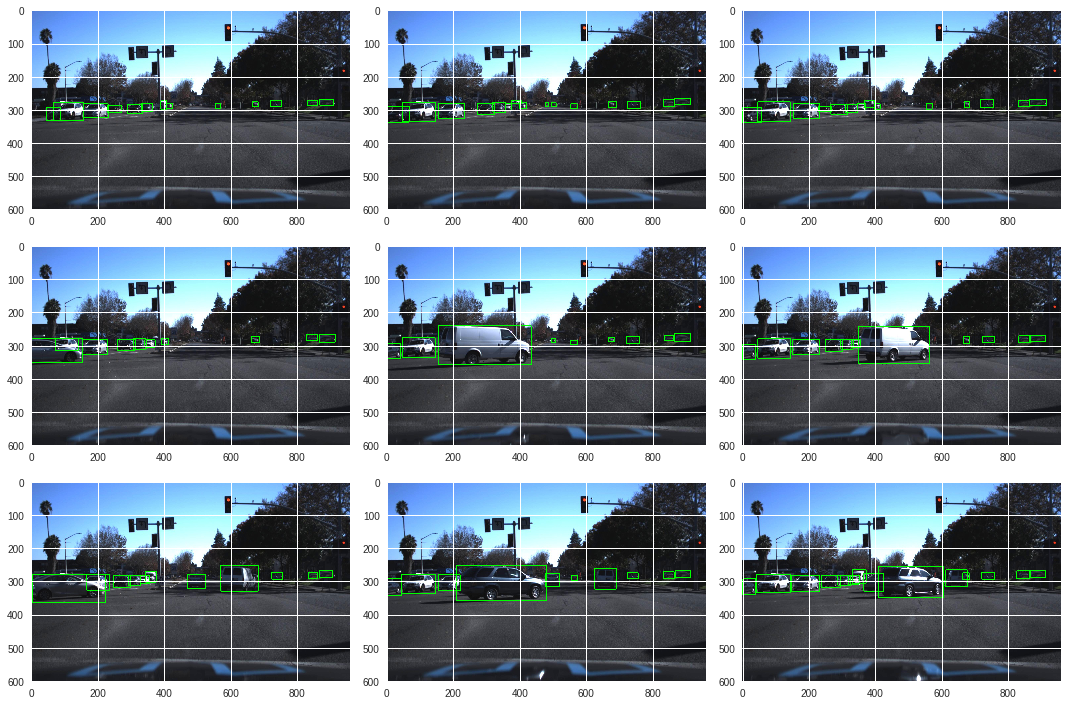

In [16]:
import tensorflow as tf
from object_detection.utils import dataset_util
import hashlib
import io
import PIL.Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
#visualize dataset
f, axs = plt.subplots(3, 3, figsize = (15, 10))
for ii in range(3):
    for jj in range(3):
        inx = ii * 3 + jj + 100
        filename = cardfl_1.iloc[inx]['frame']
        xmin = cardfl_1.iloc[inx]['xmin']
        ymin = cardfl_1.iloc[inx]['ymin']
        xmax = cardfl_1.iloc[inx]['xmax']
        ymax = cardfl_1.iloc[inx]['ymax']
        img = mpimg.imread(filename)
        for xm,ym,xma,yma in zip(xmin, ymin,xmax,ymax):
            xm = int(xm)
            ym=int(ym)
            xma = int(xma)
            yma = int(yma)
            cv2.rectangle(img, (xm, ym), (xma,yma), color = (0,255,0), thickness = 2)
        if ii == 0 and jj == 0:
            print(img.shape)
        axs[ii, jj].imshow(img)
plt.tight_layout()

In [0]:
import tensorflow as tf
from object_detection.utils import dataset_util
import hashlib
import io
import PIL.Image

def create_tf_example(df_row):
  #Populate the following variables from your example.
  filename = df_row['frame']
  
  with tf.gfile.GFile(filename, 'rb') as fid:
    encoded_jpg = fid.read()
  
  encoded_image_data = io.BytesIO(encoded_jpg) # Encoded image bytes
  image = PIL.Image.open(encoded_image_data)
  if image.format != 'JPEG':
    raise ValueError('Image format not JPEG')
  key = hashlib.sha256(encoded_jpg).hexdigest()

  height = 600 # Image height
  width = 960 # Image width
  
  image_format = b'jpeg'

  xmins = [max(x / width, 0) for x in df_row['xmin'] ] # List of normalized left x coordinates in bounding box (1 per box)
  xmaxs = [min(x / width, 1) for x in df_row['xmax'] ] # List of normalized right x coordinates in bounding box
             # (1 per box)
  ymins = [max(y / height, 0) for y in df_row['ymin'] ] # List of normalized top y coordinates in bounding box (1 per box)
  ymaxs = [min(y / height, 1) for y in df_row['ymax'] ] # List of normalized bottom y coordinates in bounding box
             # (1 per box)
  classes_text = ["car".encode('utf8')] * len(xmins) # List of string class name of bounding box (1 per box)
  classes = [1] * len(xmins) # List of integer class id of bounding box (1 per box)
    
  fnamebytes = filename.encode()

  tf_example = tf.train.Example(features=tf.train.Features(feature={
      'image/height': dataset_util.int64_feature(height),
      'image/width': dataset_util.int64_feature(width),
      'image/filename': dataset_util.bytes_feature(fnamebytes),
      'image/source_id': dataset_util.bytes_feature(fnamebytes),
      'image/encoded': dataset_util.bytes_feature(encoded_jpg),
      'image/format': dataset_util.bytes_feature(image_format),
      'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
      'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
      'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
      'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
      'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
      'image/object/class/label': dataset_util.int64_list_feature(classes),
  }))
  return tf_example

In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

def write_records(output_path, df):
  writer = tf.python_io.TFRecordWriter(output_path)

  for _ , row in df.iterrows():
    tf_example = create_tf_example(row)
    writer.write(tf_example.SerializeToString())

  writer.close()

# #combine both datasets
# car_df_combined = pd.concat( [cardfl_1] )

#split dataset into training and test sets
train, test = train_test_split(cardfl_1, test_size = 0.2)

#write records

write_records('./train.record', train)
write_records('./test.record', test)

In [31]:
#@title Command to train
!python object_detection/train.py --logtostderr --pipeline_config_path=./ssd_mobilenet_v1_coco.config --train_dir=./train

/content/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "object_detection/model_main.py", line 26, in <module>
    from object_detection import model_lib
  File "/content/models/research/object_detection/model_lib.py", line 26, in <module>
    from object_detection import eval_util
  File "/content/models/research/object_detection/eval_util.py", line 28, in <module>
    from object_detection.metrics import coco_evaluation
  File "/content/models/research/object_detection/metrics/coco_evaluation.py", line 20, in <module>
    from object_detection.metrics import coco_tools
  File "/content/models/research/object_detection/metrics/coco_tools.

In [1]:
#@title API to check RAM and GPU usage
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.7 GB  I Proc size: 147.0 MB
GPU RAM Free: 11439MB | Used: 0MB | Util   0% | Total 11439MB


In [31]:
%cd /content/

/content


In [32]:
#@title Installation of Pycoco api
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
!cp -r pycocotools /content/models/research/

Cloning into 'cocoapi'...
remote: Counting objects: 947, done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 947 (delta 3), reused 10 (delta 2), pack-reused 931
Receiving objects: 100% (947/947), 11.69 MiB | 28.91 MiB/s, done.
Resolving deltas: 100% (560/560), done.
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fdebug-prefix-map=/build/python3.6-sXpGnM/python3.6-3.6.3=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp

In [33]:
%cd /content/models/research/

/content/models/research


In [34]:
#@title Command for running evaluation

!python object_detection/eval.py --logtostderr --pipeline_config_path=./ssd_mobilenet_v1_cars.config --checkpoint_dir=./train --eval_dir=./eval

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/content/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "object_detection/eval.py", line 50, in <module>
    from object_detection import evaluator
  File "/content/models/research/object_detection/evaluator.py", line 24, in <module>
    from object_detection import eval_util
  File "/content/models/research/object_detection/eval_util.py", l

In [25]:
!ls ./train

checkpoint
events.out.tfevents.1529519115.0b2485499bba
graph.pbtxt
model.ckpt-3198.data-00000-of-00001
model.ckpt-3198.index
model.ckpt-3198.meta
model.ckpt-3670.data-00000-of-00001
model.ckpt-3670.index
model.ckpt-3670.meta
model.ckpt-4140.data-00000-of-00001
model.ckpt-4140.index
model.ckpt-4140.meta
model.ckpt-4613.data-00000-of-00001
model.ckpt-4613.index
model.ckpt-4613.meta
model.ckpt-5080.data-00000-of-00001
model.ckpt-5080.index
model.ckpt-5080.meta
pipeline.config


Copy the latest trained checkpoints to a result folder

In [0]:
!mkdir results

In [0]:
!cp ./train/model.ckpt-5080.data-00000-of-00001 ./results

In [0]:
!cp ./train/model.ckpt-5080.index ./results

In [0]:
!cp ./train/model.ckpt-5080.meta ./results

In [0]:
!mkdir ssd_mobilnet_pb_20_06_1

Export the checkpoints to a frozen graph of format .pb. It would be needed during inference.

In [31]:
!python object_detection/export_inference_graph.py  --input_type image_tensor --pipeline_config_path ./train/pipeline.config --trained_checkpoint_prefix ./results/model.ckpt-5080 --output_directory ./ssd_mobilnet_pb_20_06_1

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
2018-06-20 20:25:12.212997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-06-20 20:25:12.213661: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1392] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-06-20 20:25:12.213735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1471] Adding visible gpu devices: 0
2018-06-20 20:25:12.607184: I tenso

Zip the pb graph and upload to google drive for later usage

In [44]:
!tar -czvf ssd_mobilnet_pb_20_06_1.tar.gz ./ssd_mobilnet_pb_20_06_1

./ssd_mobilnet_pb_20_06_1/
./ssd_mobilnet_pb_20_06_1/saved_model/
./ssd_mobilnet_pb_20_06_1/saved_model/saved_model.pb
./ssd_mobilnet_pb_20_06_1/saved_model/variables/
./ssd_mobilnet_pb_20_06_1/checkpoint
./ssd_mobilnet_pb_20_06_1/model.ckpt.meta
./ssd_mobilnet_pb_20_06_1/pipeline.config
./ssd_mobilnet_pb_20_06_1/model.ckpt.index
./ssd_mobilnet_pb_20_06_1/frozen_inference_graph.pb
./ssd_mobilnet_pb_20_06_1/model.ckpt.data-00000-of-00001


In [45]:
#@title  { display-mode: "code" }
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

uploaded = drive.CreateFile({'title': 'ssd_mobilnet_pb_20_06_1.tar.gz'})
uploaded.SetContentFile('ssd_mobilnet_pb_20_06_1.tar.gz')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1tjyNDFj6GgKG86IhtQbKYsLElp_aFrnc


The following sections perform the inference

In [32]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ < '1.4.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')
  
%matplotlib inline

from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

PATH_TO_CKPT = './ssd_mobilnet_pb_20_06_1/frozen_inference_graph.pb'

PATH_TO_LABELS = './car_label_map.pbtxt'

NUM_CLASSES = 1

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1h4peOCGXAiVjLhRNz8UD9mOs20LXgzSL'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test_images.zip') 
!unzip test_images.zip

PATH_TO_TEST_IMAGES_DIR = './test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 5) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

/content/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/dist

Archive:  test_images.zip
   creating: test_images/
  inflating: test_images/image6.jpg  
   creating: __MACOSX/
   creating: __MACOSX/test_images/
  inflating: __MACOSX/test_images/._image6.jpg  
  inflating: test_images/image4.jpg  
  inflating: __MACOSX/test_images/._image4.jpg  
  inflating: test_images/image5.jpg  
  inflating: __MACOSX/test_images/._image5.jpg  
  inflating: test_images/image1.jpg  
  inflating: __MACOSX/test_images/._image1.jpg  
  inflating: test_images/image2.jpg  
  inflating: __MACOSX/test_images/._image2.jpg  
  inflating: test_images/image3.jpg  
  inflating: __MACOSX/test_images/._image3.jpg  
  inflating: __MACOSX/._test_images  


In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

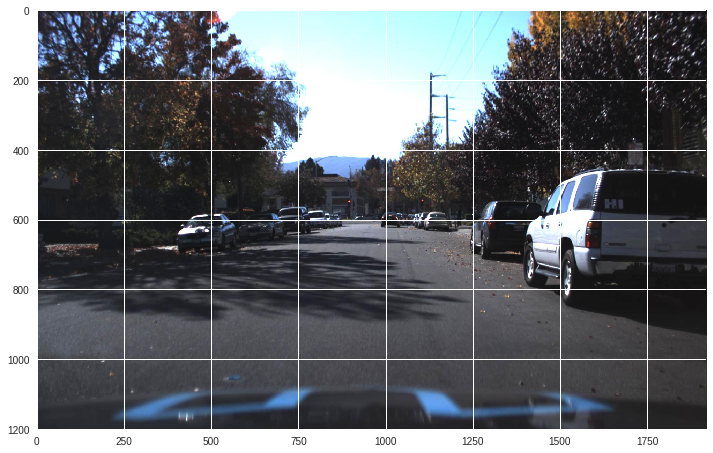

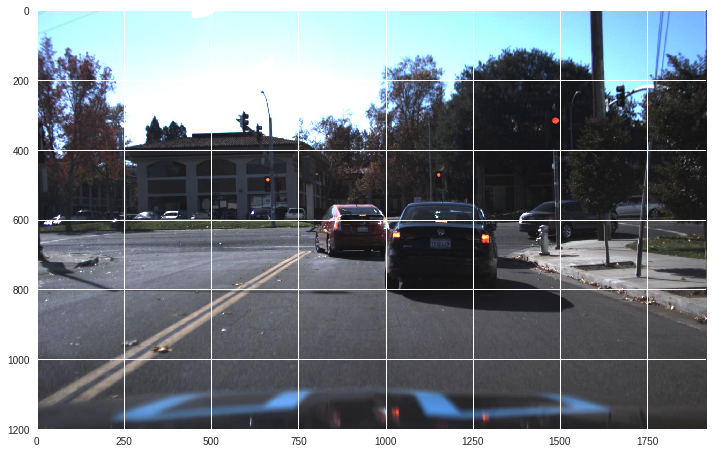

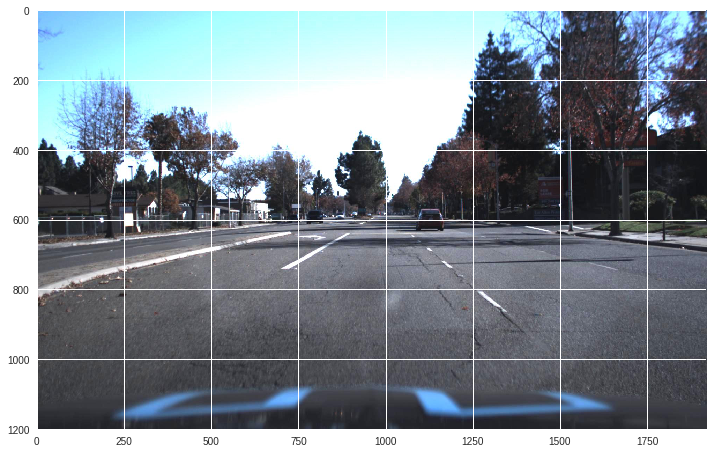

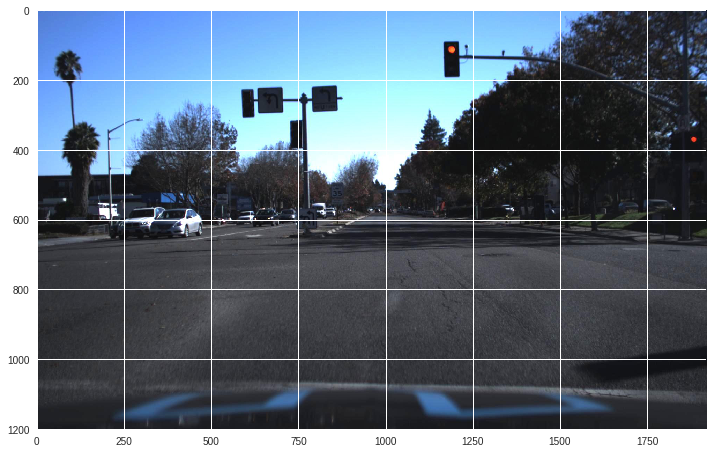

In [34]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
